In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
%matplotlib inline

In [9]:
def model(y, t, *arg):
    u, v = y
    dydt= np.empty(len(y))
    dydt[0] = -u + au/(1 + (v / (1 + arg[1]/K)**n)**b)
    dydt[1] = -v + av/(1 + (u / (1 + arg[0]/K)**n)**b)
    return dydt

In [10]:
au = 10
av = 9
K = 3
n, b = 2, 2

In [11]:
t1 = np.linspace(0, 50, 100)
t2 = np.linspace(50, 100, 100)
t3 = np.linspace(100, 150, 100)
t4 = np.linspace(150, 200, 100)
y0= np.array([0, 0])

In [12]:
n, b = 2, 2
# pass y0 (0, 0) as initial condition to odeint function, 
# and set the the last number of return array as the initial condition of next funciton. 

# Iu and Iv are passed to odeint by args argument(set as a tuple ). 
y1 = odeint(model, y0, t1, args = (100, 0)) 
y2 = odeint(model, y1[-1, :], t2, args = (0, 0))
y3 = odeint(model, y2[-1, :], t3, args = (0, 100))
y4 = odeint(model, y3[-1, :], t4, args = (0, 0))

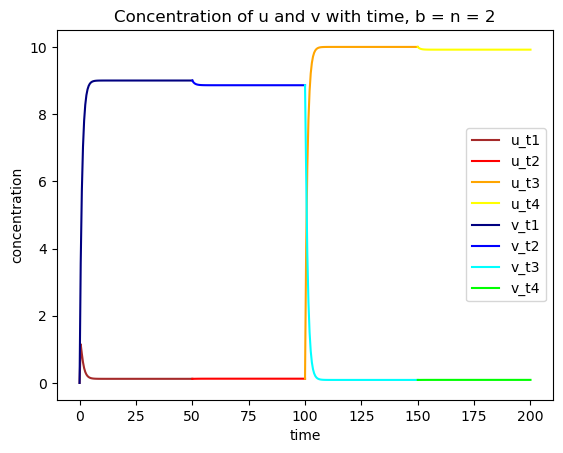

In [13]:
# plot the figure for u and v in 4 time periods. 
plt.figure()
# colors of u are warm colors
plt.plot(t1, y1[:, 0], 'brown', label = "u_t1")
plt.plot(t2, y2[:, 0], 'red', label = "u_t2")
plt.plot(t3, y3[:, 0], 'orange', label = "u_t3")
plt.plot(t4, y4[:, 0], 'yellow', label = "u_t4")
# colors of v are cool colors
plt.plot(t1, y1[:, 1], 'navy', label = "v_t1")
plt.plot(t2, y2[:, 1], 'blue', label = "v_t2")
plt.plot(t3, y3[:, 1], 'cyan', label = "v_t3")
plt.plot(t4, y4[:, 1], 'lime', label = "v_t4")
plt.xlabel('time')
plt.ylabel('concentration')
plt.title('Concentration of u and v with time, b = n = 2')
plt.legend()
plt.show()